In [18]:
from pandas import read_excel
import pandas as pd
import os
from sklearn.cluster import KMeans

In [19]:
dir_path = os.path.dirname(os.path.realpath("__file__"))
df = read_excel(dir_path + "/Dry_Bean_Dataset.xlsx", sheet_name="Dry_Beans_Dataset")
for col in df.columns:
    df[col].fillna(0, inplace=True)
#df.isnull().sum()

In [20]:
iris_outcome = pd.crosstab(index=df["Class"],columns="count")
iris_outcome

col_0,count
Class,
BARBUNYA,1322
BOMBAY,522
CALI,1630
DERMASON,3546
HOROZ,1928
SEKER,2027
SIRA,2636


In [21]:
df.groupby(by="Class").count()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
BARBUNYA,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322
BOMBAY,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522
CALI,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630
DERMASON,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546
HOROZ,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928
SEKER,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027
SIRA,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636,2636


In [22]:
X = df.drop(df.columns[16:], axis = 1)
y = df["Class"]
#func = lambda x: float(x)
#X.applymap(func)

In [23]:
y

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [24]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [25]:
kmeans = KMeans(n_clusters=7, n_init=10)

In [26]:
y_kmeans = kmeans.fit_predict(X)

In [27]:
y_kmeans.get_feature_names_out()

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names_out'

In [ ]:
len([x for x in y_kmeans == 0 if x == True])

4191

In [ ]:
etiketler = list(set(y))
renkler = ['purple','orange','green','red','cyan','magenta','yellow']

In [ ]:
etiketler = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

['SEKER', 'CALI', 'HOROZ', 'SIRA', 'DERMASON', 'BARBUNYA', 'BOMBAY']

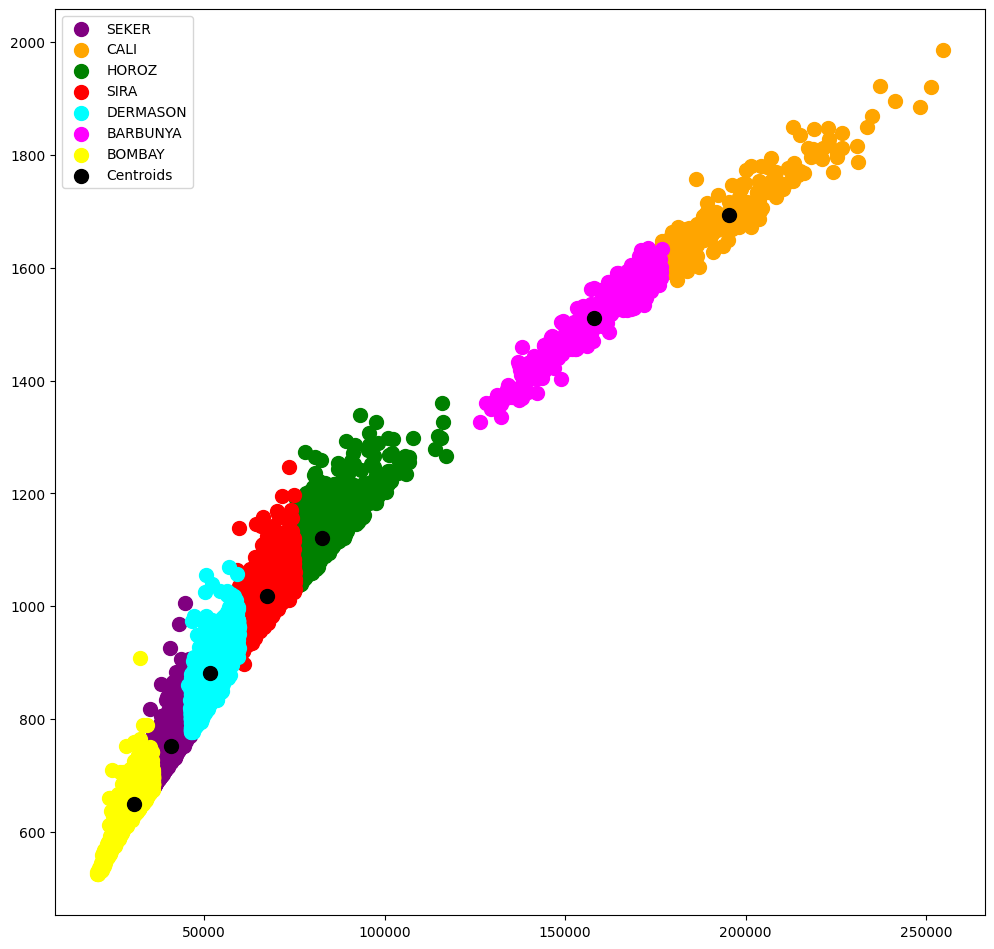

In [ ]:
#Visualising the clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12), dpi=100)
for i in range(0,7):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1], s = 100, c = renkler[i], label = etiketler[i])
'''plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'BARBUNYA')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'BOMBAY')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s = 100, c = 'green', label = 'CALI')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s = 100, c = 'red', label = 'DERMASON')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'HOROZ')
plt.scatter(X.values[y_kmeans == 5, 0], X.values[y_kmeans == 5, 1], s = 100, c = 'magenta', label = 'SEKER')
plt.scatter(X.values[y_kmeans == 6, 0], X.values[y_kmeans == 6, 1], s = 100, c = 'yellow', label = 'SIRA')'''


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.savefig('2d.png')

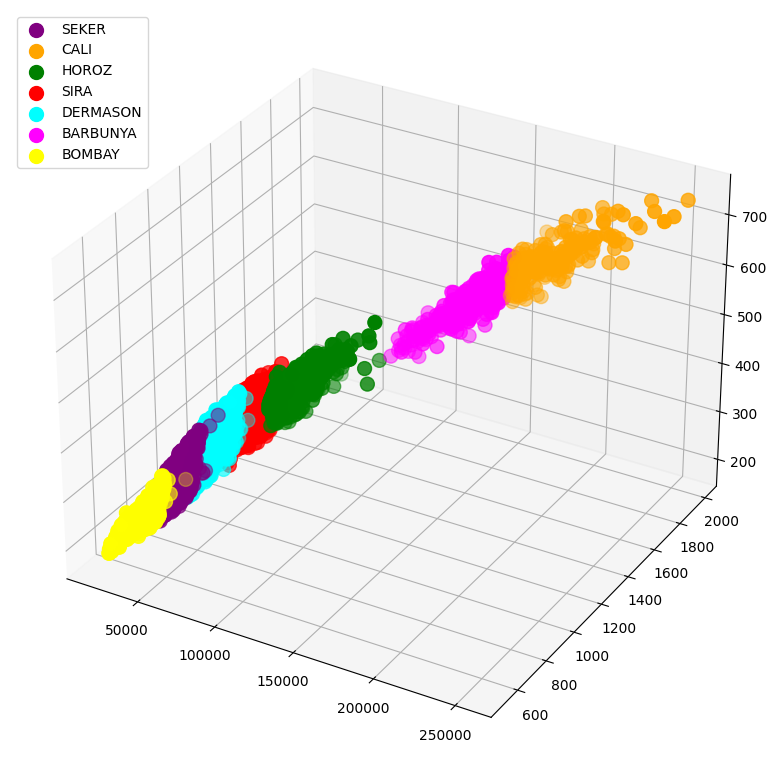

In [ ]:
fig = plt.figure(figsize = (10,10), dpi=100)
ax = fig.add_subplot(111, projection='3d')

for i in range(0,7):
    ax.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1], X.values[y_kmeans == i, 2], s = 100, c = renkler[i], label = etiketler[i])

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:, 2], c = 'black', label = 'Centroids')

#plt.savefig('3d.png')
plt.legend(loc='upper left')
plt.show()


In [ ]:
len(y)

13611

In [ ]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, kmeans.labels_)
ari

0.37259053354469235

In [ ]:
from sklearn.metrics import rand_score
ris = rand_score(y, kmeans.labels_)
ris

0.8035901074308279

In [ ]:
from sklearn.metrics import mutual_info_score
mis = mutual_info_score(y, kmeans.labels_)
print(mis)

0.8970483073419362


In [ ]:
kmeans.cluster_centers_[0,:]

array([4.07920707e+04, 7.52707990e+02, 2.75646233e+02, 1.89745200e+02,
       1.46487115e+00, 7.04726044e-01, 4.12543749e+04, 2.27750599e+02,
       7.55862980e-01, 9.88826967e-01, 9.05886792e-01, 8.30927974e-01,
       6.76546693e-03, 2.01367182e-03, 6.93785130e-01, 9.96602891e-01])

In [ ]:
df= pd.DataFrame(kmeans.cluster_centers_[:])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,40792.070729,752.707990,275.646233,189.745200,1.464871,0.704726,41254.374910,227.750599,0.755863,0.988827,0.905887,0.830928,0.006765,0.002014,0.693785,0.996603
1,195500.465438,1693.237074,639.643548,392.683714,1.632461,0.786177,198292.327189,498.532334,0.779176,0.985991,0.856212,0.780448,0.003281,0.000753,0.609877,0.990700
2,82592.192340,1120.804876,422.014940,251.240766,1.685225,0.798948,83903.711907,324.033143,0.756108,0.984383,0.826582,0.769274,0.005125,0.001112,0.592914,0.992050
3,67351.200000,1018.542996,384.456972,225.291985,1.721352,0.802165,68433.182245,292.677866,0.743781,0.984223,0.816515,0.763885,0.005727,0.001210,0.585811,0.992778
4,51703.841482,882.080714,342.868872,194.145855,1.784198,0.809696,52408.549274,256.408822,0.728077,0.986646,0.837493,0.753330,0.006636,0.001341,0.571209,0.993868
5,158100.864686,1510.611987,560.876066,361.467658,1.553816,0.760223,160104.603960,448.313187,0.774875,0.987532,0.870088,0.800795,0.003555,0.000906,0.642120,0.992639
6,30726.921185,649.479363,237.836576,164.829068,1.451007,0.710825,31092.307692,197.471694,0.756282,0.988181,0.913228,0.831828,0.007800,0.002310,0.693621,0.997070


In [ ]:
y

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytr = le.fit_transform(y)
le.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

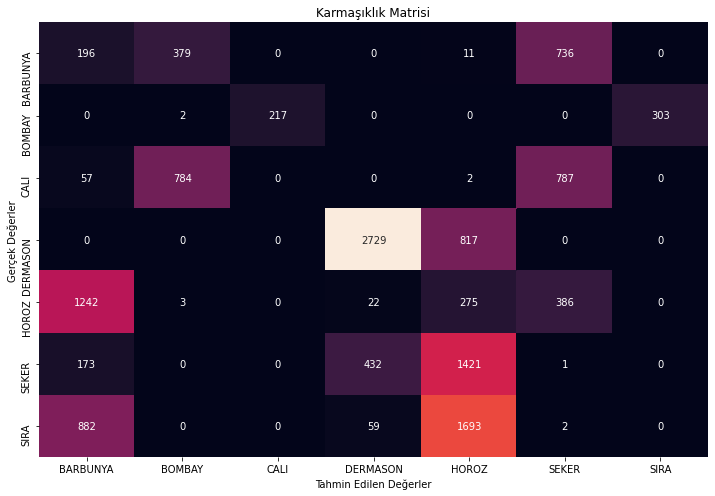

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_matrix = confusion_matrix(ytr, kmeans.labels_)
cm_df = pd.DataFrame(cnf_matrix,index = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], columns = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'])
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True, cbar=False, fmt='g')
plt.title('Karmaşıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()